In [12]:
# encoding: utf-8
# Author: Zhuangwei Kang

import os, sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
sys.path.append('../../')
from datapsr import *
import numpy as np
style.use(['classic'])
plt.rc('axes', axisbelow=True)
dpi=600

ipykernel_launcher:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
ipykernel_launcher:21: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
[58.8, 8.8, 10.3, 12.9, 17.6, 17.2]
[58.8, 8.5, 4.7, 6.1, 9.2, 9.1]


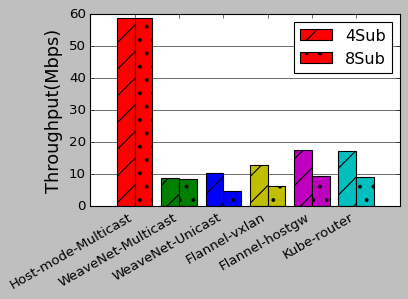

In [13]:
plugins = ['hostnetwork-multicast-udp', 'weavenet-multicast-udp', 'weavenet-unicast-udp', 'flannel-vxlan-udp', 'flannel-hostgw-udp', 'kube-router-udp']
data_len = [1024]

x = np.arange(len(plugins))
total_width, n = 0.8, 2
width = total_width / n
x_ = x
x = x - (total_width - width) / 2

markers = ['^', 'o', 'X', 'P', 's']
labels = ['Host-mode-Multicast', 'WeaveNet-Multicast', 'WeaveNet-Unicast', 'Flannel-vxlan', 'Flannel-hostgw', 'Kube-router']
patterns = ('/','//','-', '+', 'x', '\\', '\\\\', '*', 'o', 'O', '.')

plt.figure(figsize=(5, 3))
throughput_perf, _ = load_data([2],  plugins, path='./4subs')
plt.bar(x, throughput_perf['mbps(ave)'], width=width, label='4Sub', color='rgbymc', hatch='/')

print(throughput_perf['mbps(ave)'].round(2).to_list())

throughput_perf, _ = load_data([2],  plugins, path='./8subs')
plt.bar(x+width, throughput_perf['mbps(ave)'], width=width, label='8Sub', color='rgbymc', hatch='.')
print(throughput_perf['mbps(ave)'].round(2).to_list())

# plt.xlabel('# of Sub', fontsize=16)
plt.ylabel('Throughput(Mbps)', fontsize=16)
plt.grid(linestyle='-', axis='y')

plt.legend(loc="best", ncol=1)
plt.xticks(x_, labels, rotation=30, ha='right')
plt.savefig('throughput.png', dpi=dpi, bbox_inches='tight')


[27.45, 24.29, 25.9, 25.86, 26.49, 26.47]
[27.45, 25.45, 25.49, 25.57, 25.71, 25.64]


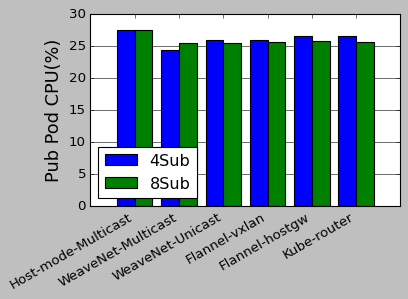

In [14]:
plugins = ['hostnetwork-multicast-udp', 'weavenet-multicast-udp', 'weavenet-unicast-udp', 'flannel-vxlan-udp', 'flannel-hostgw-udp', 'kube-router-udp']
data_len = [1024]

x = np.arange(len(plugins))
total_width, n = 0.8, 2
width = total_width / n
x_ = x
x = x - (total_width - width) / 2

markers = ['^', 'o', 'X', 'P', 's']
labels = ['Host-mode-Multicast', 'WeaveNet-Multicast', 'WeaveNet-Unicast', 'Flannel-vxlan', 'Flannel-hostgw', 'Kube-router']

plt.figure(figsize=(5, 3))
_, cpu_perf = load_data([2],  plugins, path='./4subs')
plt.bar(x, cpu_perf['cpu'], width=width, label='4Sub')
print(cpu_perf['cpu'].round(2).to_list())

_, cpu_perf = load_data([2],  plugins, path='./8subs')
plt.bar(x+width, cpu_perf['cpu'], width=width, label='8Sub')
print(cpu_perf['cpu'].round(2).to_list())

plt.ylabel('Pub Pod CPU(%)', fontsize=16)
plt.grid(linestyle='-', axis='y')

plt.legend(loc="lower left", ncol=1)
plt.xticks(x_, labels, rotation=30, ha='right')
plt.savefig('podcpu.png', dpi=dpi, bbox_inches='tight')


[36. 35. 32. 31. 35. 32.]
[36. 42. 33. 32. 35. 32.]


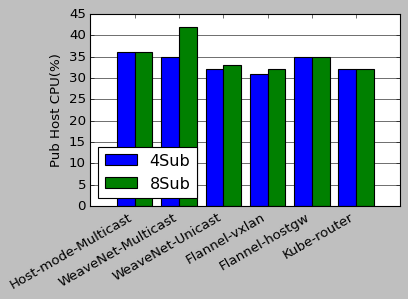

In [15]:

pub_cpu = []
pub_cpu_std = []

for ns, numsubs in enumerate([4, 8]):
    pub_cpu.append([])
    pub_cpu_std.append([])
    for cni in plugins:
        for i in range(len(data_len)):
            data = pd.read_csv('%dsubs/throughputTest/%s/test-2/metrics.csv' % (numsubs, cni))
            pub_cpu[ns].append(data[data['name'] == 'raspberrypi87']['cpu%(90%)'].to_list())
            pub_cpu_std[ns].append(data[data['name'] == 'raspberrypi87']['cpu%(std)'].to_list())

pub_cpu = np.array(pub_cpu).squeeze()
pub_cpu_std = np.array(pub_cpu_std).squeeze()

x = np.arange(len(plugins))
total_width, n = 0.8, 2
width = total_width / n
x_ = x
x = x - (total_width - width) / 2

plt.figure(figsize=(5, 3))
plt.bar(x, pub_cpu[0], width=width, label='4Sub')
print(pub_cpu[0].round(2))
plt.bar(x+width, pub_cpu[1], width=width, label='8Sub')
print(pub_cpu[1].round(2))

plt.xticks(x_, labels, rotation=30, ha='right')
plt.grid(linestyle='-', axis='y')

plt.legend()
plt.legend(loc="lower left", ncol=1)
plt.ylabel('Pub Host CPU(%)')
plt.savefig('hostcpu.png', dpi=dpi, bbox_inches='tight')

[54. 55. 68. 74. 74. 70.]
[54. 55. 68. 73. 74. 69.]


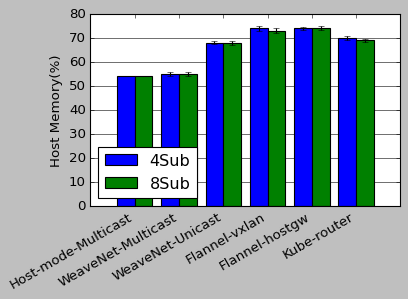

In [16]:

pub_cpu = []
pub_cpu_std = []

for ns, numsubs in enumerate([4, 8]):
    pub_cpu.append([])
    pub_cpu_std.append([])
    for cni in plugins:
        for i in range(len(data_len)):
            data = pd.read_csv('%dsubs/throughputTest/%s/test-2/metrics.csv' % (numsubs, cni))
            pub_cpu[ns].append(data[data['name'] == 'raspberrypi87']['memory%(90%)'].to_list())
            pub_cpu_std[ns].append(data[data['name'] == 'raspberrypi87']['memory%(std)'].to_list())

pub_cpu = np.array(pub_cpu).squeeze()
pub_cpu_std = np.array(pub_cpu_std).squeeze()

x = np.arange(len(plugins))
total_width, n = 0.8, 2
width = total_width / n
x_ = x
x = x - (total_width - width) / 2

plt.figure(figsize=(5, 3))
plt.bar(x, pub_cpu[0], yerr=pub_cpu_std[0], width=width, label='4Sub')
print(pub_cpu[0].round(2))
plt.bar(x+width, pub_cpu[1], yerr=pub_cpu_std[1], width=width, label='8Sub')
print(pub_cpu[1].round(2))

plt.xticks(x_, labels, rotation=30, ha='right')
plt.grid(linestyle='-', axis='y')

plt.legend()
plt.legend(loc="lower left", ncol=1)
plt.ylabel('Host Memory(%)')
plt.savefig('hostmemory.png', dpi=dpi, bbox_inches='tight')

[231.4, 326.5, 319.0, 407.6, 336.8, 398.7]
[240.2, 331.5, 371.2, 460.3, 377.9, 407.6]


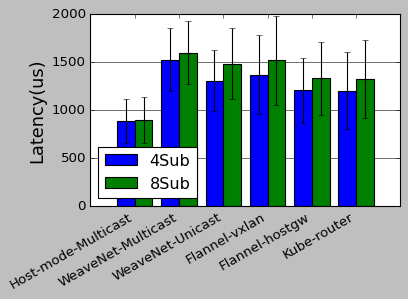

In [17]:
plugins = ['hostnetwork-multicast-udp', 'weavenet-multicast-udp', 'weavenet-unicast-udp', 'flannel-vxlan-udp', 'flannel-hostgw-udp', 'kube-router-udp']
data_len = [1024]

x = np.arange(len(plugins))
total_width, n = 0.8, 2
width = total_width / n
x_ = x
x = x - (total_width - width) / 2

markers = ['^', 'o', 'X', 'P', 's']
labels = ['Host-mode-Multicast', 'WeaveNet-Multicast', 'WeaveNet-Unicast', 'Flannel-vxlan', 'Flannel-hostgw', 'Kube-router']

plt.figure(figsize=(5, 3))
_, latency_perf = load_data([14],  plugins, path='./4subs', latencyTest=True)
plt.bar(x, latency_perf['latencyave'], yerr=latency_perf['std'], width=width, label='4Sub')
print(latency_perf['std'].round(2).to_list())

_, latency_perf = load_data([14],  plugins, path='./8subs', latencyTest=True)
plt.bar(x+width, latency_perf['latencyave'], yerr=latency_perf['std'], width=width, label='8Sub')
print(latency_perf['std'].round(2).to_list())

# plt.xlabel('# of Sub', fontsize=16)
plt.ylabel('Latency(us)', fontsize=16)
plt.grid(linestyle='-', axis='y')

plt.legend(loc="best", ncol=1)
plt.xticks(x_, labels, rotation=30, ha='right')
plt.savefig('latency.png', dpi=dpi, bbox_inches='tight')


In [26]:
plugins = ['weavenet-multicast', 'weavenet-unicast', 'flannel-vxlan', 'flannel-hostgw', 'kube-router']
data_len = [1024]

perf,_ = load_data([0],  plugins, path='./12subs')
print(perf['mbps(ave)'].round(2).to_list())
_,perf = load_data([0],  plugins, path='./12subs')
print(perf['cpu'].round(2).to_list())

_, perf = load_data([0],  plugins, path='./12subs', latencyTest=True)
print(perf['90%'].round(2).to_list())
print(perf['std'].round(2).to_list())

[7.5, 2.8, 3.3, 5.3, 5.6]
[25.2, 25.27, 25.48, 25.52, 25.57]
[2043.0, 2281.0, 1924.0, 1608.0, 1589.0]
[468.2, 572.8, 508.1, 412.8, 455.0]


In [38]:

pub_cpu = []
pub_cpu_std = []

for cni in plugins:
    for i in range(len(data_len)):
        data = pd.read_csv('12subs/throughputTest/%s/test-0/metrics.csv' % cni)
        pub_cpu.append(data[data['name'] == 'raspberrypi87']['cpu%(90%)'].to_list())
        pub_cpu_std.append(data[data['name'] == 'raspberrypi87']['cpu%(std)'].to_list())

pub_cpu = np.array(pub_cpu).squeeze()
pub_cpu_std = np.array(pub_cpu_std).squeeze()
print(pub_cpu)
print(pub_cpu_std)

# [60. 33. 33. 33. 32.]
# [27.9  12.21 13.57 13.41 12.5 ]

[50. 32. 33. 33. 32.]
[18.83 12.06 13.57 13.41 12.5 ]


In [23]:
pub_memory = []
pub_memory_std = []

for cni in plugins:
    for i in range(len(data_len)):
        data = pd.read_csv('12subs/throughputTest/%s/test-0/metrics.csv' % cni)
        pub_memory.append(data[data['name'] == 'raspberrypi87']['memory%(90%)'].to_list())
        pub_memory_std.append(data[data['name'] == 'raspberrypi87']['memory%(std)'].to_list())

pub_memory = np.array(pub_memory).squeeze()
pub_memory_std = np.array(pub_memory_std).squeeze()
print(pub_memory)
print(pub_memory_std)

[56. 58. 71. 69. 73.]
[0.87 1.18 0.98 0.55 0.5 ]


ipykernel_launcher:91: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


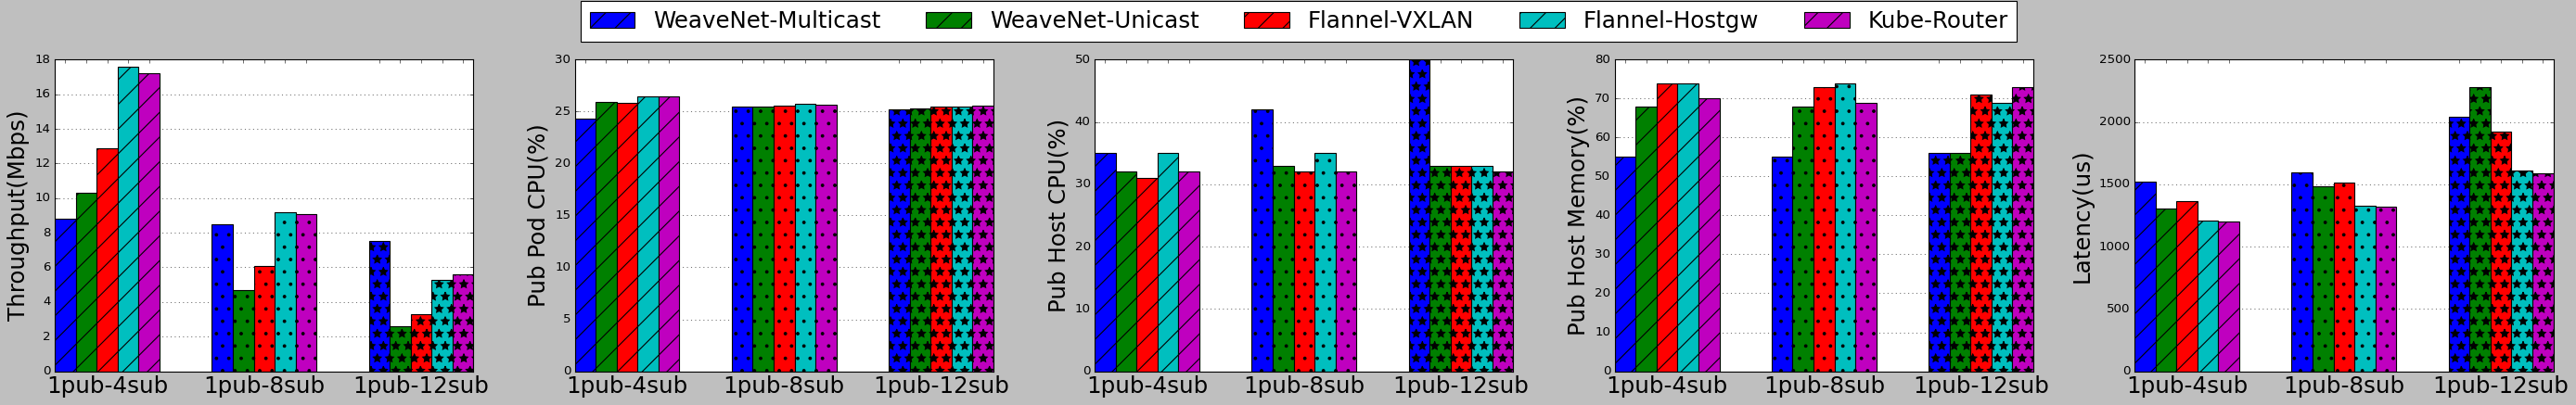

In [39]:
# tpt_4sub = [58.8, 8.8, 10.3, 12.9, 17.6, 17.2]
# tpt_8sub = [58.8, 8.5, 4.7, 6.1, 9.2, 9.1]
tpt_4sub = [8.8, 10.3, 12.9, 17.6, 17.2]
tpt_8sub = [8.5, 4.7, 6.1, 9.2, 9.1]
tpt_12sub = [7.5, 2.6, 3.3, 5.3, 5.6]

# pcpu_4sub = 4*np.array([27.45, 24.29, 25.9, 25.86, 26.49, 26.47])
# pcpu_8sub = 4*np.array([27.45, 25.45, 25.49, 25.57, 25.71, 25.64])
pcpu_4sub = np.array([24.29, 25.9, 25.86, 26.49, 26.47])
pcpu_8sub = np.array([25.45, 25.49, 25.57, 25.71, 25.64])
pcpu_12sub = np.array([25.2, 25.34, 25.48, 25.52, 25.57])

# phcpu_4sub = [36, 35, 32, 31, 35, 32]
# phcpu_8sub = [36, 42, 33, 32, 35, 32]
phcpu_4sub = [35, 32, 31, 35, 32]
phcpu_8sub = [42, 33, 32, 35, 32]
phcpu_12sub = [50, 33, 33, 33, 32]

# phmem_4sub = [54, 55, 68, 74, 74, 70]
# phmem_8sub = [54, 55, 68, 73, 74, 69]
phmem_4sub = [55, 68, 74, 74, 70]
phmem_8sub = [55, 68, 73, 74, 69]
phmem_12sub = [56, 56, 71, 69, 73]

# lat_4sub = [1597.0, 1480.0, 1516.0, 1327.0, 1322.0]
# lat_8sub = [1918.0, 1848.0, 1862.0, 1599.0, 1585.0]
lat_4sub = [1522.0, 1302.0, 1368.0, 1205.0, 1200.0]
lat_8sub = [1597.0, 1480.0, 1516.0, 1327.0, 1322.0]
lat_12sub = [2043.0, 2281.0, 1924.0, 1608.0, 1589.0]

lat_4sub_std = [326.5, 319.0, 407.6, 336.8, 398.7]
lat_8sub_std = [331.5, 371.2, 460.3, 377.9, 407.6]
lat_12sub_std = [468.2, 572.8, 508.1, 412.8, 455.0]

fig, ax = plt.subplots(1, 5, figsize=(35, 5), sharex=True)

# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 22}

# matplotlib.rc('font', **font)

# mylabels = ['HostMode-Multicast', 'WeaveNet-Multicast', 'WeaveNet-Unicast', 'Flannel-VXLAN', 'Flannel-Hostgw', 'Kube-Router']
mylabels = ['WeaveNet-Multicast', 'WeaveNet-Unicast', 'Flannel-VXLAN', 'Flannel-Hostgw', 'Kube-Router']
bars = []
def helper(i, y, ylabel):
    global ax, bars
    total_width, n = 1, 15
    width = total_width / n
    
    x1 = np.zeros(5)
    for j in range(5):
        x1[j] += j*width
    x2 = x1+0.5
    x3 = x2+0.5

    for k in range(len(x1)):
        b = ax[i].bar([x1[k]], [y[0][k]], color='C%d' % k, width=width, hatch='/', label=mylabels[k])
        bars.append(b)

    for k in range(len(x2)):
        ax[i].bar([x2[k]], [y[1][k]], color='C%d' % k, width=width, hatch='.')

    for k in range(len(x3)):
        ax[i].bar([x3[k]], [y[2][k]], color='C%d' % k, width=width, hatch='*')
    
    all_x = np.concatenate((x1, x2, x3), axis=None)
    labels = ['' for k in range(len(all_x))]
    labels[2] = '1pub-4sub'
    labels[7] = '1pub-8sub'
    labels[12] = '1pub-12sub'

    
    ax[i].set_xticks(all_x)
    ax[i].set_xticklabels(labels, fontsize=22)
    ax[i].set_ylabel(ylabel, fontsize=22)
    ax[i].grid(axis='y')

helper(0, [tpt_4sub, tpt_8sub, tpt_12sub], 'Throughput(Mbps)')
helper(1, [pcpu_4sub, pcpu_8sub, pcpu_12sub], 'Pub Pod CPU(%)')
helper(2, [phcpu_4sub, phcpu_8sub, phcpu_12sub], 'Pub Host CPU(%)')
helper(3, [phmem_4sub, phmem_8sub, phmem_12sub], 'Pub Host Memory(%)')
helper(4, [lat_4sub, lat_8sub, lat_12sub], 'Latency(us)')

fig.legend(bars[:5],     # The line objects
           labels=mylabels,   # The labels for each line
           loc="upper center",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           bbox_to_anchor=(0.5,1.15),
           ncol=6,
           fontsize=22)

# plt.legend(bbox_to_anchor=(-1.9,1.15), loc='center', ncol=6, fontsize=22)
plt.tight_layout()
plt.savefig('multicast.png', dpi=600, bbox_inches='tight')